In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
buildingDamage = gpd.read_file('./data/InferencedBuildingDamage.zip')

In [3]:
buildingDamage.head()

,SQFT,centroid_x,centroid_y,ClassLabel,confidence,geometry
0,1587.186082,1.641232e+06,189783.198385,Undamaged,0.752566,"POLYGON Z ((-17439774.344 2374701.683 0.000, -..."
1,5119.349378,1.641309e+06,189708.519477,Undamaged,0.922592,"POLYGON Z ((-17439768.076 2374694.200 0.000, -..."
2,3699.311998,1.641176e+06,189841.352373,Undamaged,0.944616,"POLYGON Z ((-17439807.113 2374733.268 0.000, -..."
3,1114.820722,1.641212e+06,189868.210536,Undamaged,0.996557,"POLYGON Z ((-17439784.692 2374721.498 0.000, -..."
4,5599.013839,1.641102e+06,189947.374974,Undamaged,0.987895,"POLYGON Z ((-17439826.183 2374759.507 0.000, -..."


In [4]:
# buildingDamage.iloc[0].geometry.area, buildingDamage.iloc[0].geometry.area * 10.7639

In [5]:
buildingDamage.ClassLabel.value_counts()

ClassLabel
Damaged      2088
Undamaged    1234
Name: count, dtype: int64

In [6]:
### Generating Maui
# structureType = gpd.read_file('./data/Deliverable20230526HI/Deliverable20230526HI/HI_Structures.gdb')
# maui = structureType.loc[structureType.FIPS == '15009']
# maui.dropna(axis=1, how='any', inplace=True)
# maui.to_file('./data/mauiStructureTypes.json', driver='GeoJSON')

maui = gpd.read_file('./data/mauiStructureTypes.json')
maui.shape

(48567, 20)

In [7]:
buildingDamage.crs, maui.crs

(<Projected CRS: EPSG:3857>
 Name: WGS 84 / Pseudo-Mercator
 Axis Info [cartesian]:
 - X[east]: Easting (metre)
 - Y[north]: Northing (metre)
 Area of Use:
 - name: World between 85.06°S and 85.06°N.
 - bounds: (-180.0, -85.06, 180.0, 85.06)
 Coordinate Operation:
 - name: Popular Visualisation Pseudo-Mercator
 - method: Popular Visualisation Pseudo Mercator
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

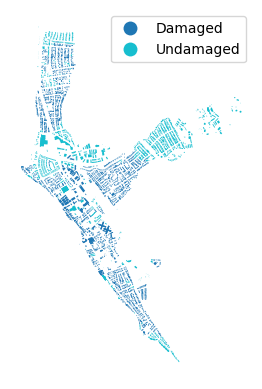

In [8]:
ax = gpd.sjoin(buildingDamage.to_crs(maui.crs), maui, predicate='intersects', how='left').plot(column='ClassLabel', legend=True)
ax.set_axis_off()
plt.show()

In [9]:
parcels = gpd.read_file('data\Parcels_-_Maui_County.zip')

In [10]:
parcels.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
gpd.sjoin(parcels, buildingDamage.to_crs(parcels.crs), predicate='intersects')

,objectid,tmk,tmk_txt,cty_tmk,landvalue,landexempt,bldgvalue,bldgexempt,pittcode,homeowner,...,qpub_link,st_areasha,st_perimet,geometry,index_right,SQFT,centroid_x,centroid_y,ClassLabel,confidence
6143,6144,246001009,246001009,46001009,3822100,3822100,1109700,1109700,300,N,...,https://qpublic.schneidercorp.com/Application....,7886.484433,356.389028,"POLYGON ((-156.67709 20.87157, -156.67710 20.8...",2368,4354.529369,1.636593e+06,195527.098889,Damaged,0.991977
6144,6145,246002002,246002002,46002002,3325200,0,2266900,0,1100,N,...,https://qpublic.schneidercorp.com/Application....,1112.979668,136.044364,"POLYGON ((-156.67321 20.86534, -156.67351 20.8...",386,4213.217962,1.638101e+06,193225.659329,Damaged,0.775807
32733,32734,246002001,246002001,46002001,4062000,45900,254100,254100,900,Y,...,https://qpublic.schneidercorp.com/Application....,1415.408123,154.176222,"POLYGON ((-156.67321 20.86534, -156.67303 20.8...",386,4213.217962,1.638101e+06,193225.659329,Damaged,0.775807
6145,6146,246002004,246002004,46002004,3754200,0,151000,0,100,N,...,https://qpublic.schneidercorp.com/Application....,1316.937810,148.822074,"POLYGON ((-156.67396 20.86564, -156.67415 20.8...",383,445.727327,1.637894e+06,193413.552174,Undamaged,0.987908
6145,6146,246002004,246002004,46002004,3754200,0,151000,0,100,N,...,https://qpublic.schneidercorp.com/Application....,1316.937810,148.822074,"POLYGON ((-156.67396 20.86564, -156.67415 20.8...",382,2731.180651,1.637949e+06,193425.501018,Undamaged,0.969540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50968,50969,245023026,245023026,45023026,810100,0,209700,0,100,N,...,https://qpublic.schneidercorp.com/Application....,3550.245462,353.232996,"POLYGON ((-156.67242 20.88180, -156.67252 20.8...",2738,69.172686,1.638358e+06,198964.057120,Damaged,0.997922
50968,50969,245023026,245023026,45023026,810100,0,209700,0,100,N,...,https://qpublic.schneidercorp.com/Application....,3550.245462,353.232996,"POLYGON ((-156.67242 20.88180, -156.67252 20.8...",2737,1319.456668,1.638327e+06,198978.429605,Damaged,0.983235
50968,50969,245023026,245023026,45023026,810100,0,209700,0,100,N,...,https://qpublic.schneidercorp.com/Application....,3550.245462,353.232996,"POLYGON ((-156.67242 20.88180, -156.67252 20.8...",2742,3168.778937,1.638207e+06,199010.473743,Damaged,0.936545
50968,50969,245023026,245023026,45023026,810100,0,209700,0,100,N,...,https://qpublic.schneidercorp.com/Application....,3550.245462,353.232996,"POLYGON ((-156.67242 20.88180, -156.67252 20.8...",2739,120.131670,1.638300e+06,199047.800612,Damaged,0.987856


In [12]:
fireBorder = gpd.read_file('./data/EOS')
fireBorder.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
# fireBorder.set_crs(crs=parcels.crs, inplace=True)

In [14]:
fireBorder = fireBorder.loc[fireBorder.ID == 'F7']

In [20]:
pitts = dict(zip(
    sorted(list(parcels.pittcode.unique())),
    ['Timeshare', 'Non-Owner-Occupied/Residential',
    'Apartment', 'Non-residential',
    'Non-residential', 'Non-residential',
    'Non-residential', 'Non-residential',
    'Owner-Occupied/Homeowner', 'Multiple Codes', 
    'Commercialized Residential', 'Short-term Rental', 
    'Long-term Rental']
))

In [21]:
fireParcels = gpd.overlay(fireBorder, parcels, how='intersection')
fireParcels['pittcode'] = fireParcels['pittcode'].map(lambda x: pitts[x])

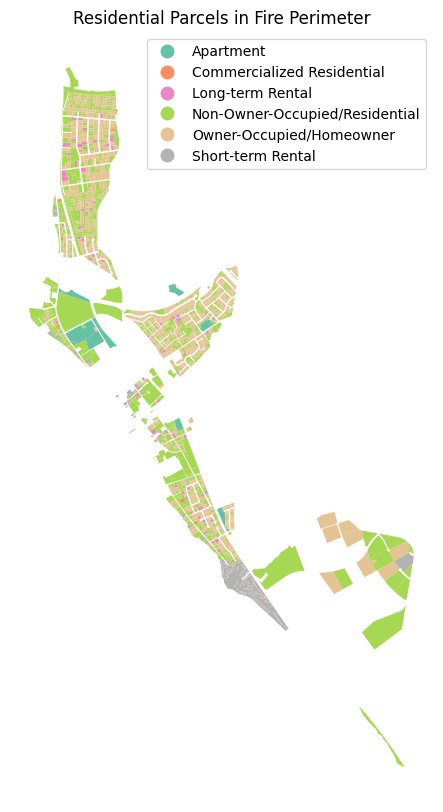

In [85]:
fig = plt.figure(figsize=(14, 10), dpi=100)
ax = fig.add_subplot(121)
fireParcels[~fireParcels.pittcode.isin(['Non-residential', 'Timeshare', 'Multiple Codes'])].plot(ax=ax, column='pittcode', legend=True, cmap='Set2')
ax.set_axis_off()
ax.set_title('Residential Parcels in Fire Perimeter')
plt.show()

In [55]:
gpd.overlay(fireBorder, parcels, how='intersection').shape, gpd.overlay(fireBorder, parcels, how='intersection').columns

((2629, 27),
 Index(['ID', 'n_pixels', 'n_newpixel', 'farea', 'fperim', 'flinelen',
        'duration', 'pixden', 'meanFRP', 't', 'objectid', 'tmk', 'tmk_txt',
        'cty_tmk', 'landvalue', 'landexempt', 'bldgvalue', 'bldgexempt',
        'pittcode', 'homeowner', 'nhoodcode', 'taxacres', 'gisacres',
        'qpub_link', 'st_areasha', 'st_perimet', 'geometry'],
       dtype='object'))

In [87]:
gpd.overlay(buildingDamage.to_crs(maui.crs), maui, how='intersection')

,SQFT,centroid_x,centroid_y,ClassLabel,confidence,BUILD_ID,OCC_CLS,PRIM_OCC,PROP_ST,SQMETERS,...,USNG,LONGITUDE,LATITUDE,IMAGE_NAME,IMAGE_DATE,VAL_METHOD,UUID,Shape_Length,Shape_Area,geometry
0,3699.311998,1.641176e+06,189841.352373,Undamaged,0.944616,358935,Residential,Multi - Family Dwelling,Hawaii,247.046783,...,04Q GJ 43026 07966,-156.664385,20.855955,1030010035A81000,2014-07-18 00:00:00+00:00,Automated,{0d1383b6-3982-42d6-8a0e-a73c8c38d014},0.000828,2.217887e-08,"POLYGON Z ((-156.66430 20.85593 0.00000, -156...."
1,5599.013839,1.641102e+06,189947.374974,Undamaged,0.987895,359123,Residential,Single Family Dwelling,Hawaii,236.074432,...,04Q GJ 42991 08011,-156.664657,20.856329,1030010035A81000,2014-07-18 00:00:00+00:00,Automated,{8d834619-14bd-4693-8975-510b502f9cc7},0.000735,2.191354e-08,"POLYGON Z ((-156.66458 20.85630 0.00000, -156...."
2,5022.155911,1.641018e+06,190071.178502,Undamaged,0.996433,359305,Residential,Single Family Dwelling,Hawaii,170.572174,...,04Q GJ 42960 08048,-156.664904,20.856658,1030010035A81000,2014-07-18 00:00:00+00:00,Automated,{5aaac503-b8d3-44ce-95bc-33ad45298af0},0.000756,1.553871e-08,"POLYGON Z ((-156.66481 20.85664 0.00000, -156...."
3,5022.155911,1.641018e+06,190071.178502,Undamaged,0.996433,359485,Residential,Multi - Family Dwelling,Hawaii,349.788818,...,04Q GJ 42947 08073,-156.665074,20.856898,1030010035A81000,2014-07-18 00:00:00+00:00,Automated,{011a32a1-5867-4352-8b31-e2cbf38bb856},0.000776,2.762468e-08,"POLYGON Z ((-156.66504 20.85676 0.00000, -156...."
4,3277.166558,1.640941e+06,190180.277873,Undamaged,0.998128,359485,Residential,Multi - Family Dwelling,Hawaii,349.788818,...,04Q GJ 42947 08073,-156.665074,20.856898,1030010035A81000,2014-07-18 00:00:00+00:00,Automated,{011a32a1-5867-4352-8b31-e2cbf38bb856},0.000776,2.762468e-08,"POLYGON Z ((-156.66509 20.85700 0.00000, -156...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,2017.480799,1.635162e+06,203155.634965,Damaged,0.984475,390336,Residential,Single Family Dwelling,Hawaii,208.400833,...,04Q GJ 41121 12003,-156.682066,20.892621,103001005BBDE000,2016-08-07 00:00:00+00:00,Automated,{167fe5e4-3be4-493f-b8ba-8367762b235b},0.000614,1.594115e-08,"POLYGON Z ((-156.68210 20.89257 0.00000, -156...."
3023,269.726150,1.635158e+06,203118.116525,Damaged,0.998573,390336,Residential,Single Family Dwelling,Hawaii,208.400833,...,04Q GJ 41121 12003,-156.682066,20.892621,103001005BBDE000,2016-08-07 00:00:00+00:00,Automated,{167fe5e4-3be4-493f-b8ba-8367762b235b},0.000614,1.594115e-08,"MULTIPOLYGON Z (((-156.68205 20.89257 0.00000,..."
3024,2835.915610,1.635093e+06,201775.627840,Damaged,0.993071,386638,Residential,Single Family Dwelling,Hawaii,285.906189,...,04Q GJ 41106 11585,-156.682268,20.888849,103001005BBDE000,2016-08-07 00:00:00+00:00,Automated,{7d15b136-ddaf-4434-aee7-b0f74caed91f},0.000601,2.231714e-08,"POLYGON Z ((-156.68228 20.88879 0.00000, -156...."
3025,18760.868547,1.637975e+06,198148.435836,Damaged,0.990452,374402,Commercial,Professional/Technical Services,Hawaii,1328.123779,...,04Q GJ 42008 10486,-156.673765,20.878857,1030010035A81000,2014-07-18 00:00:00+00:00,Automated,{a6e2ee00-839c-4e3d-aeb8-0e482ca912bb},0.002896,1.087880e-07,"POLYGON Z ((-156.67360 20.87900 0.00000, -156...."


<Axes: >

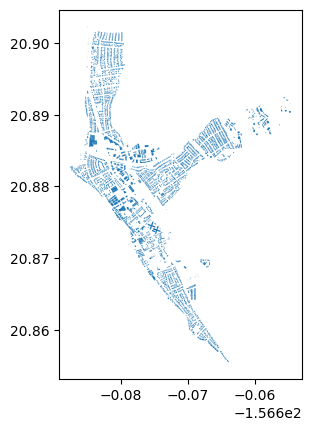

In [95]:
gpd.overlay(buildingDamage.to_crs(maui.crs), maui, how='union').dropna(subset='ClassLabel').plot()

In [97]:
gpd.overlay(buildingDamage.to_crs(maui.crs), maui, how='union').dropna(subset='ClassLabel').groupby('OCC_CLS').size()

OCC_CLS
Agriculture       29
Assembly           5
Commercial       218
Education         89
Government         1
Industrial        16
Residential     2654
Unclassified      15
dtype: int64

In [101]:
overlayedBuildings = gpd.overlay(buildingDamage.to_crs(maui.crs), maui, how='union').dropna(subset='ClassLabel')

In [109]:
overlayedBuildings.loc[overlayedBuildings.OCC_CLS.isnull(), 'OCC_CLS'] = 'No classification'

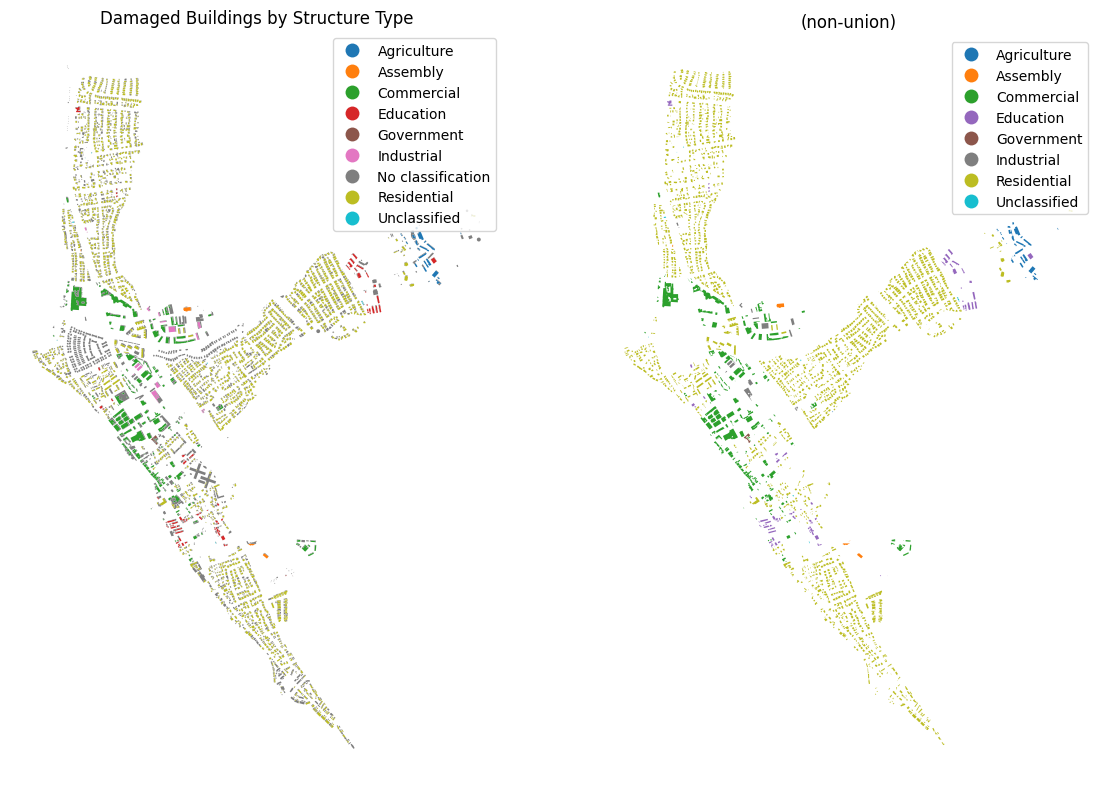

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(14, 10), dpi=100)
# ax = fig.add_subplot(121)
overlayedBuildings.plot(ax=ax[0], column='OCC_CLS', legend=True)
ax[0].set_axis_off()
ax[0].set_title('Damaged Buildings by Structure Type')

gpd.overlay(buildingDamage.to_crs(maui.crs), maui, how='intersection').dropna(subset='ClassLabel').plot(ax=ax[1], column='OCC_CLS', legend=True)
ax[1].set_axis_off()
ax[1].set_title('(non-union)')
plt.show()

In [118]:
gpd.overlay(buildingDamage.to_crs(maui.crs), maui, how='intersection').ClassLabel.value_counts()

ClassLabel
Damaged      1983
Undamaged    1044
Name: count, dtype: int64